In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow

In [2]:
def plot_waveguide_mode(a, b, m, n, mode_type='TE', num_arrows=15):
    # Define the waveguide dimensions and the spatial grid
    x = np.linspace(0, a, num_arrows)
    y = np.linspace(0, b, num_arrows)
    X, Y = np.meshgrid(x, y)

    # Constants
    omega = 2 * np.pi * 1e9  # arbitrary frequency, 1 GHz
    mu = 4 * np.pi * 1e-7  # permeability of free space

    if mode_type == 'TE':
        # TE mode formulas for Hz
        Hz = np.cos(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
        k_c = np.sqrt((m * np.pi / a)**2 + (n * np.pi / b)**2)
        Ex = -(1j * omega * mu / k_c**2) * np.gradient(Hz, y, axis=1)
        Ey = (1j * omega * mu / k_c**2) * np.gradient(Hz, x, axis=0)

    # Calculate magnitude of E for color representation
    E_magnitude = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, E_magnitude, shading='auto', cmap='viridis')
    plt.colorbar(label='|E| (V/m)')
    plt.streamplot(X, Y, Ex.real, Ey.real, color='white', density=1.5)
    plt.title(f'Electric Field Pattern for {mode_type} mode TE{m}{n}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.xlim([0, a])
    plt.ylim([0, b])
    plt.show()

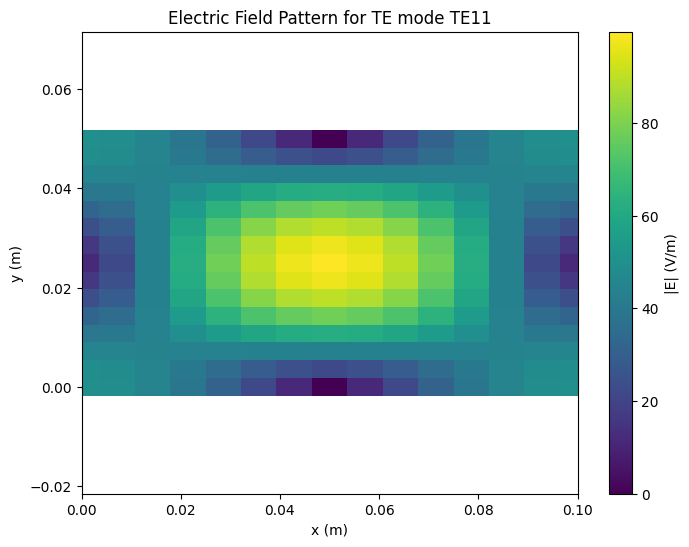

In [3]:
# Example usage
plot_waveguide_mode(0.1, 0.05, 1, 1, 'TE')  # TE11 mode in a waveguide of 10cm x 5cm

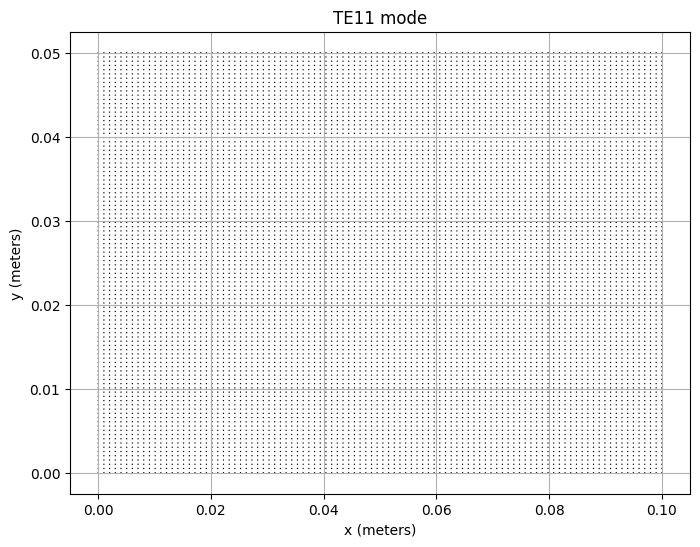

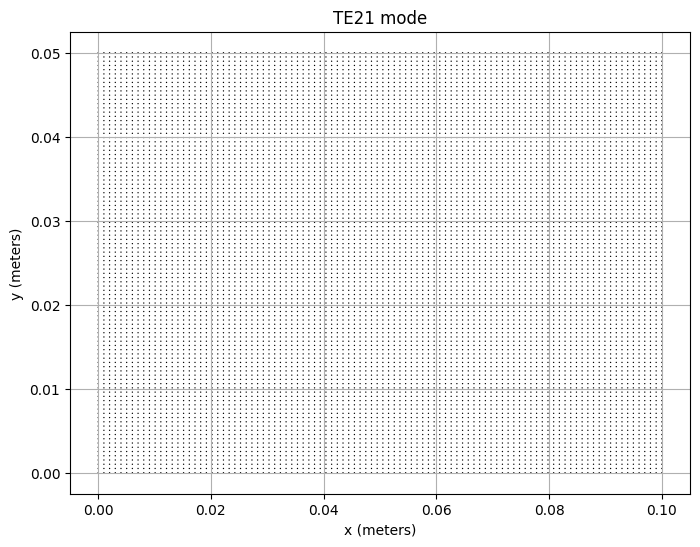

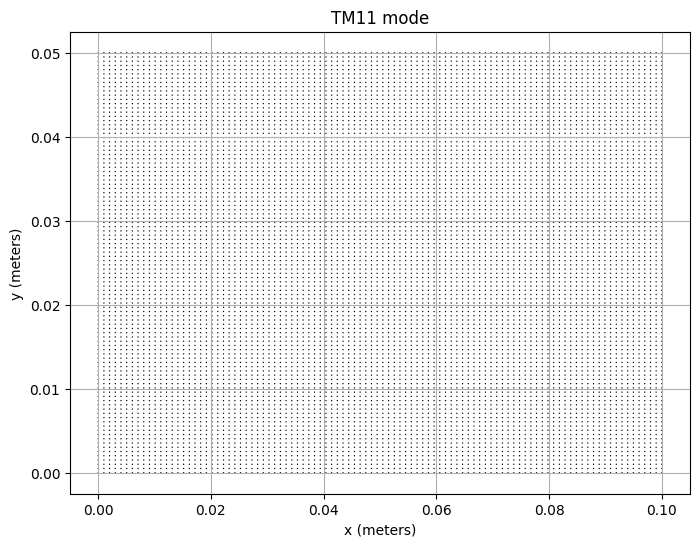

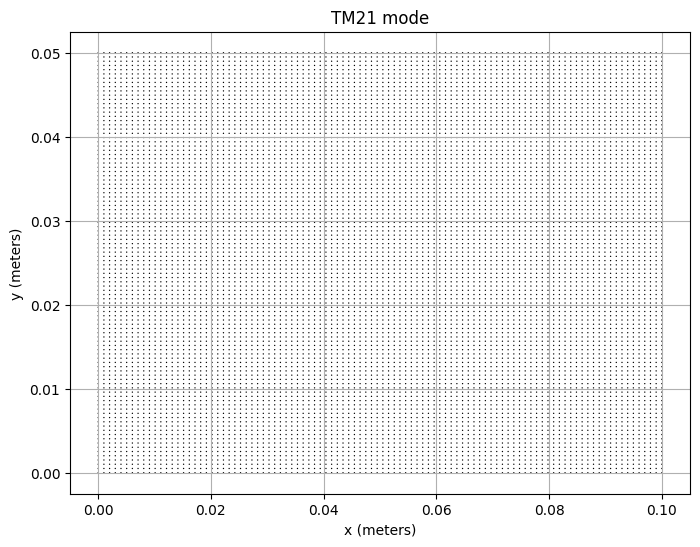

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_waveguide_mode(a, b, m, n, mode_type='TE'):
    # Define the grid
    x = np.linspace(0, a, 100)
    y = np.linspace(0, b, 100)
    X, Y = np.meshgrid(x, y)

    # Constants
    omega = 2 * np.pi * 1e9  # frequency in rad/s (arbitrarily 1 GHz)
    mu = 4 * np.pi * 1e-7    # permeability of free space
    epsilon = 8.854e-12      # permittivity of free space

    k_c = np.sqrt((m * np.pi / a)**2 + (n * np.pi / b)**2)
    if k_c == 0:
        print("Invalid mode numbers m and n for the given waveguide. k_c cannot be zero.")
        return

    dx = x[1] - x[0]  # spacing in x
    dy = y[1] - y[0]  # spacing in y

    if mode_type == 'TE':
        Hz = np.cos(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
        Ex = -(1j * omega * mu / k_c**2) * np.gradient(Hz, dy, axis=1)
        Ey = (1j * omega * mu / k_c**2) * np.gradient(Hz, dx, axis=0)
        title = f'TE{m}{n} mode'
        vector_field_x = Ex.real
        vector_field_y = Ey.real

    elif mode_type == 'TM':
        Ez = np.sin(m * np.pi * X / a) * np.cos(n * np.pi * Y / b)
        Hx = -(1j * omega * epsilon / k_c**2) * np.gradient(Ez, dy, axis=1)
        Hy = (1j * omega * epsilon / k_c**2) * np.gradient(Ez, dx, axis=0)
        title = f'TM{m}{n} mode'
        vector_field_x = Hx.real
        vector_field_y = Hy.real

    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, vector_field_x, vector_field_y, scale=5)
    plt.title(title)
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.grid(True)
    plt.show()

# Example usage: Visualizing multiple modes
modes = [('TE', 1, 1), ('TE', 2, 1), ('TM', 1, 1), ('TM', 2, 1)]
for mode_type, m, n in modes:
    plot_waveguide_mode(0.1, 0.05, m, n, mode_type)


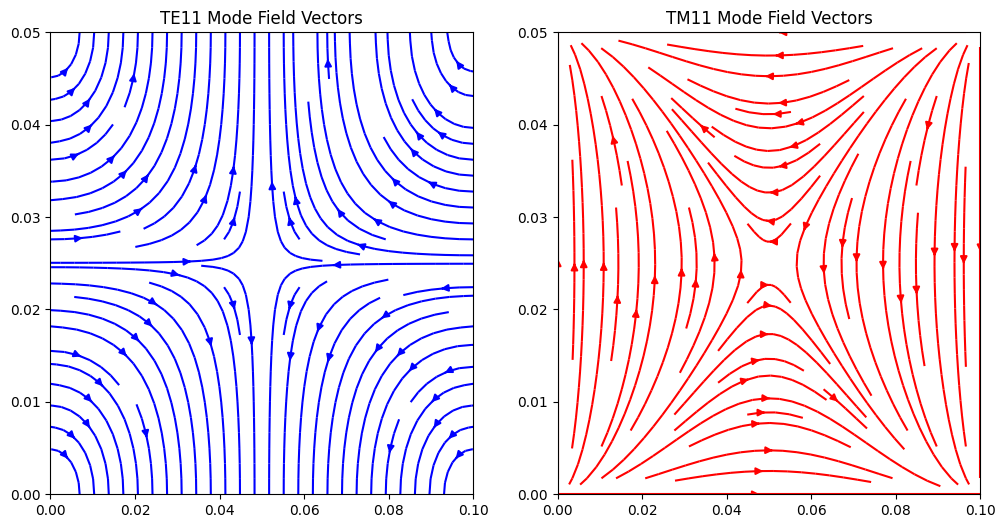

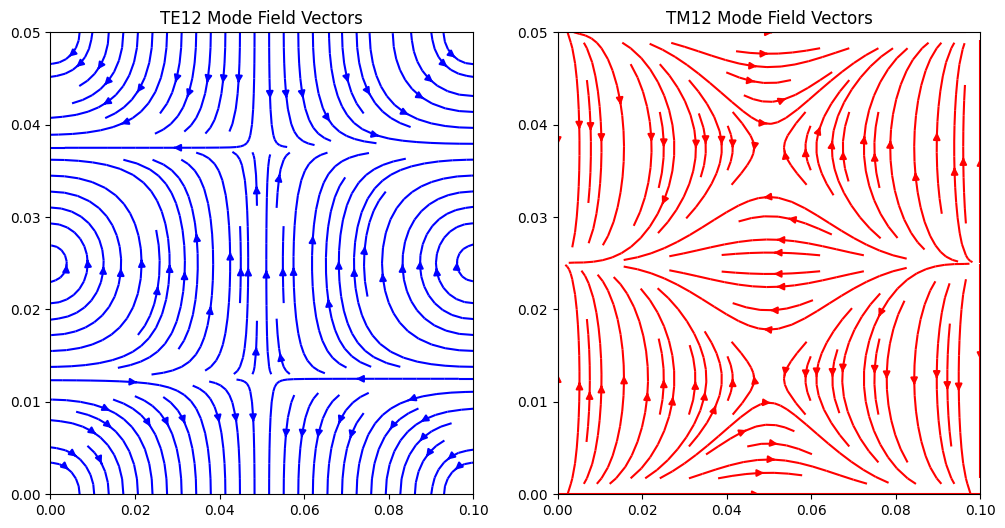

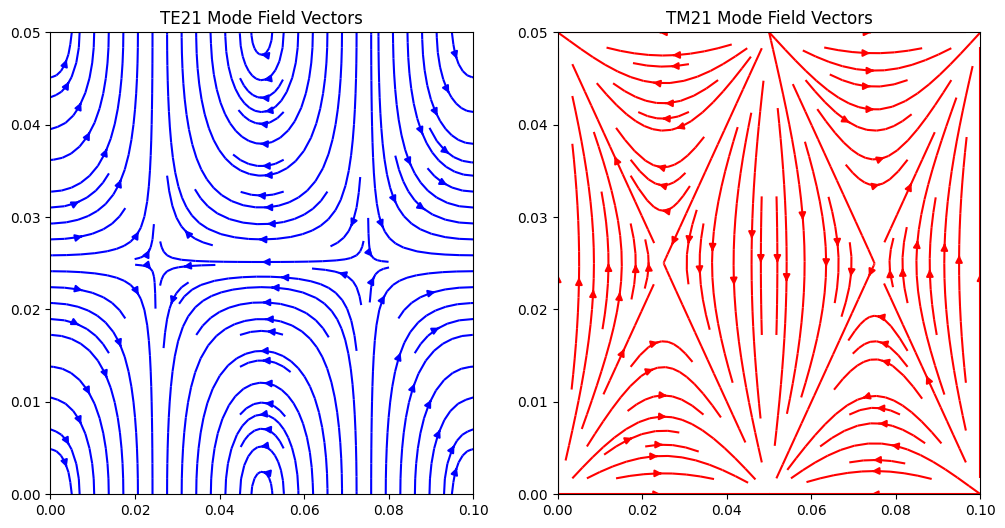

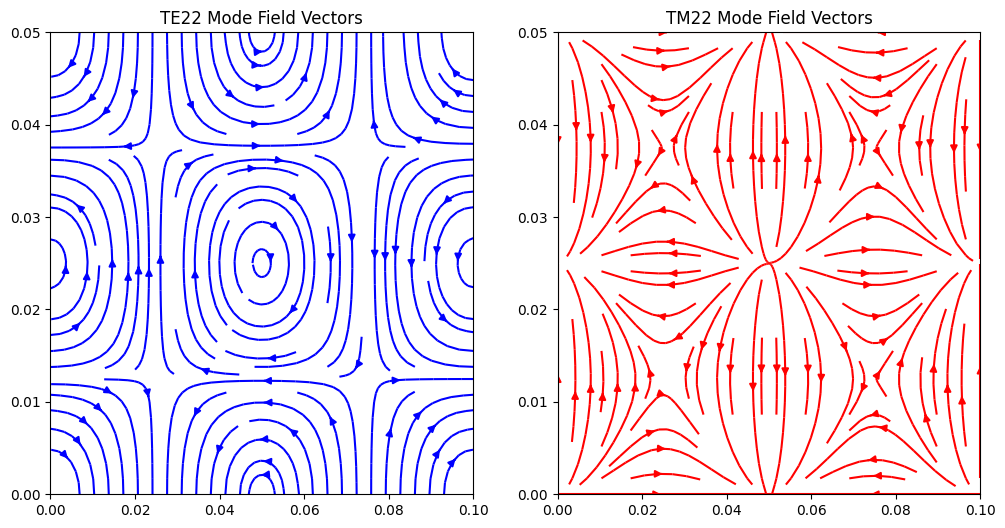

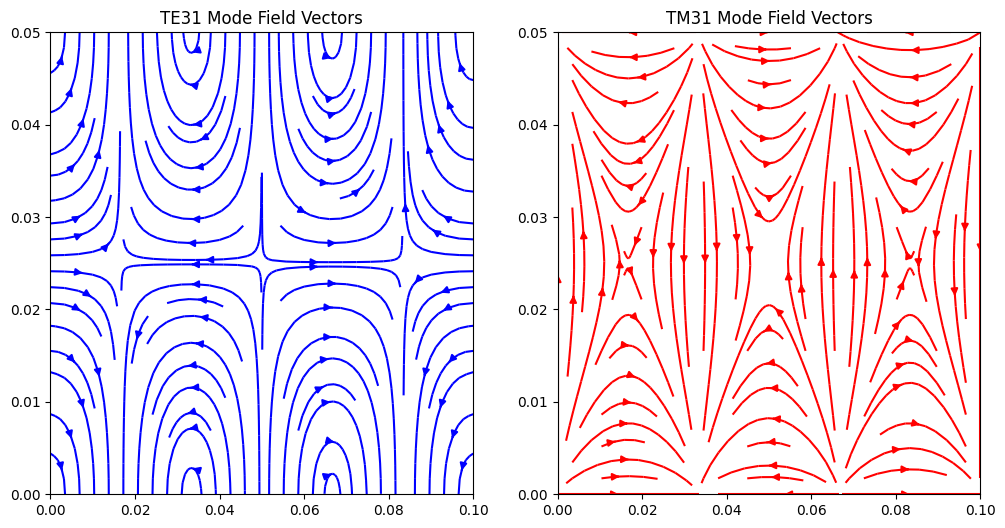

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, epsilon_0

PI = np.pi

class TE_TM_Functions:
    def __init__(self, m, n, a, b):
        self.m = m
        self.n = n
        self.a = a
        self.b = b
        self.f = 2 * self.Fc()
        self.w = 2 * PI * self.f

    def Kc(self):
        return np.sqrt((self.m * PI / self.a)**2 + (self.n * PI / self.b)**2)

    def Fc(self):
        return (1 / (2 * np.sqrt(mu_0 * epsilon_0))) * np.sqrt(
            (self.m / self.a)**2 + (self.n / self.b)**2
        )

    def beta_g(self):
        fc_val = self.Fc()
        return self.w * np.sqrt(mu_0 * epsilon_0) * np.sqrt(1 - (fc_val / self.f)**2)

    def v_G(self):
        return self.w / self.beta_g()

    def Z_in(self):
        return np.sqrt(mu_0 / epsilon_0)

    def Z_G_TE(self):
        return self.Z_in() / np.sqrt(1 - (self.Fc() / self.f)**2)

    def Z_G_TM(self):
        return self.Z_in() * np.sqrt(1 - (self.Fc() / self.f)**2)

    def lambda_G(self):
        return 2 * PI / self.beta_g()

# Define the waveguide dimensions
a, b = 0.1, 0.05  # Dimensions in meters

# Range of mode numbers to plot
mode_numbers = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1)]

# Create plots for TE and TM modes
for mode in mode_numbers:
    m, n = mode
    te_tm = TE_TM_Functions(m, n, a, b)

    # Define the grid
    x = np.linspace(0, a, 100)
    y = np.linspace(0, b, 100)
    X, Y = np.meshgrid(x, y)

    # TE mode fields
    u_te = np.cos(m * PI / a * X) * np.sin(n * PI / b * Y)
    v_te = -np.sin(m * PI / a * X) * np.cos(n * PI / b * Y)

    # TM mode fields
    u_tm = np.sin(m * PI / a * X) * np.cos(n * PI / b * Y)
    v_tm = np.cos(m * PI / a * X) * np.sin(n * PI / b * Y)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].streamplot(X, Y, u_te, v_te, color='blue')
    ax[0].set_title(f'TE{m}{n} Mode Field Vectors')
    ax[0].set_xlim([0, a])
    ax[0].set_ylim([0, b])

    ax[1].streamplot(X, Y, u_tm, v_tm, color='red')
    ax[1].set_title(f'TM{m}{n} Mode Field Vectors')
    ax[1].set_xlim([0, a])
    ax[1].set_ylim([0, b])

    plt.show()


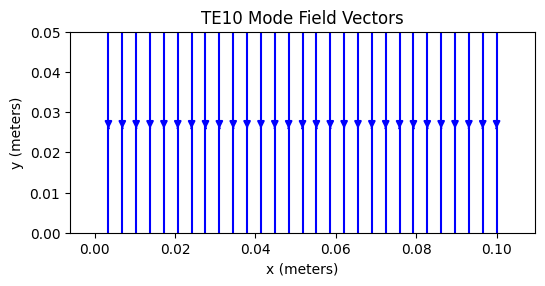

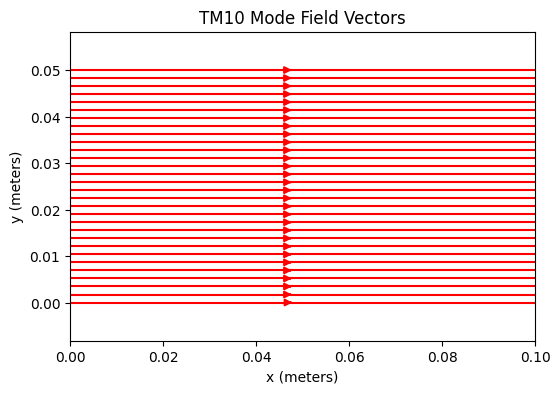

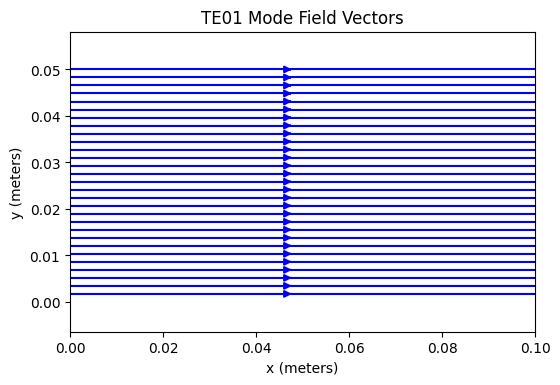

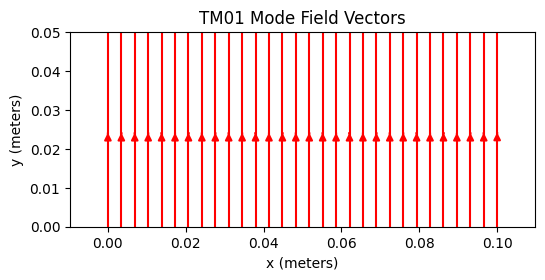

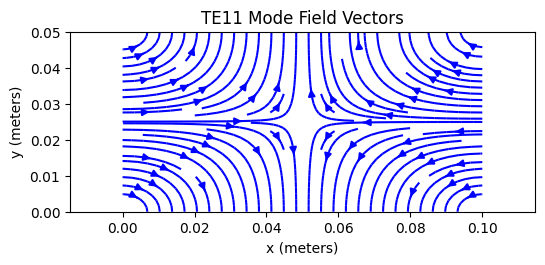

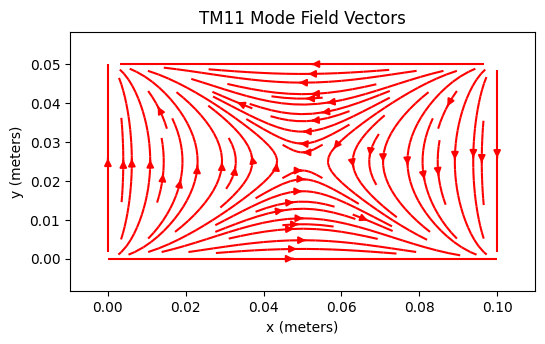

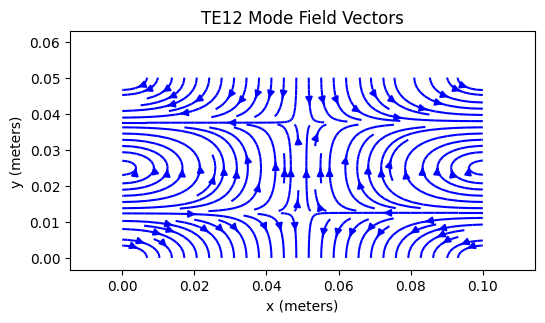

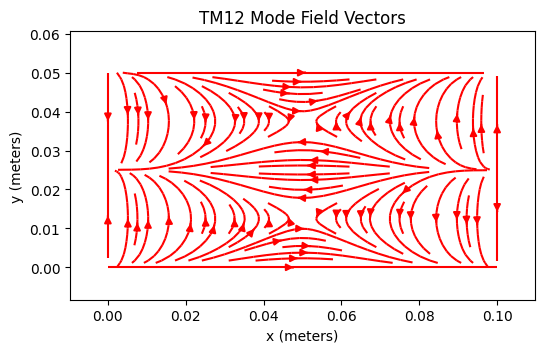

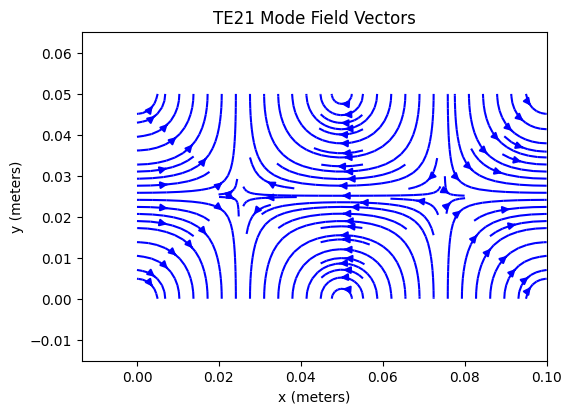

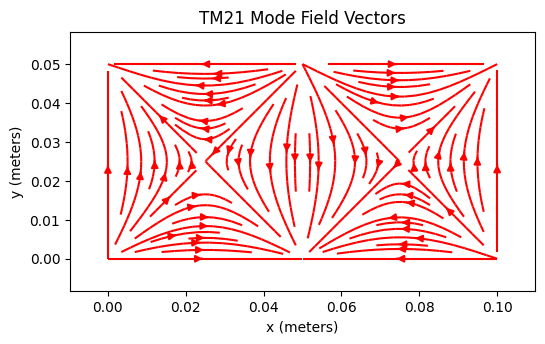

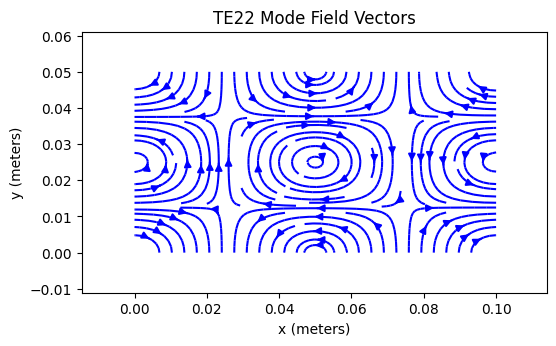

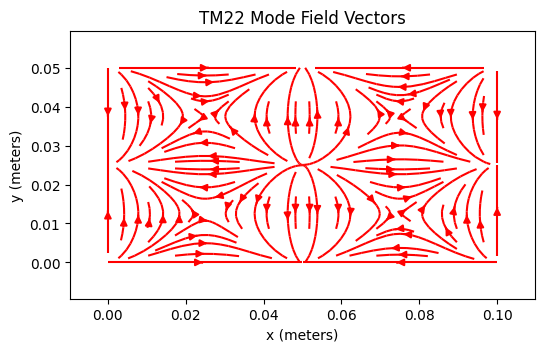

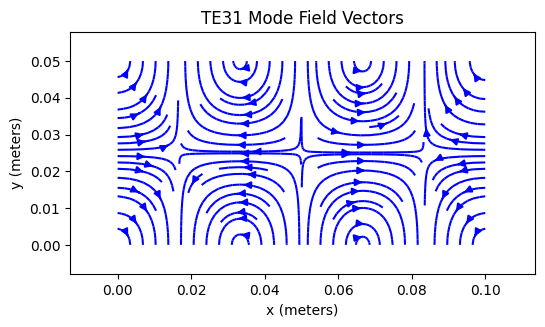

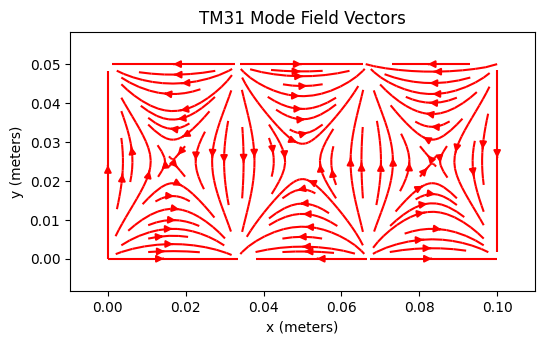

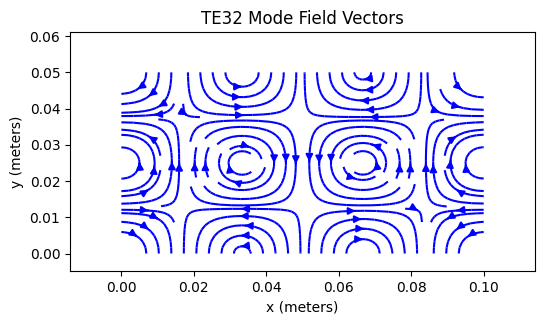

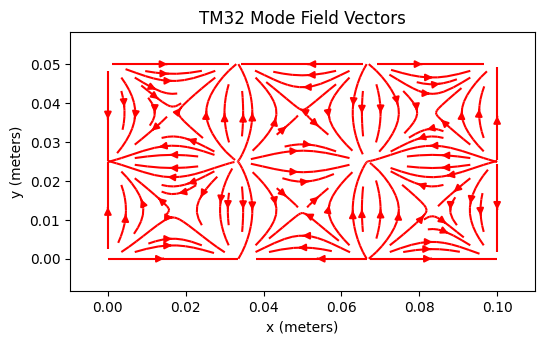

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, epsilon_0

PI = np.pi

class TE_TM_Functions:
    def __init__(self, m, n, a, b):
        self.m = m
        self.n = n
        self.a = a
        self.b = b
        self.f = 2 * self.Fc()
        self.w = 2 * PI * self.f

    def Kc(self):
        return np.sqrt((self.m * PI / self.a)**2 + (self.n * PI / self.b)**2)

    def Fc(self):
        return (1 / (2 * np.sqrt(mu_0 * epsilon_0))) * np.sqrt(
            (self.m / self.a)**2 + (self.n / self.b)**2
        )

    def beta_g(self):
        fc_val = self.Fc()
        return self.w * np.sqrt(mu_0 * epsilon_0) * np.sqrt(1 - (fc_val / self.f)**2)

    def v_G(self):
        return self.w / self.beta_g()

    def Z_in(self):
        return np.sqrt(mu_0 / epsilon_0)

    def Z_G_TE(self):
        return self.Z_in() / np.sqrt(1 - (self.Fc() / self.f)**2)

    def Z_G_TM(self):
        return self.Z_in() * np.sqrt(1 - (self.Fc() / self.f)**2)

    def lambda_G(self):
        return 2 * PI / self.beta_g()

# Define the waveguide dimensions
a, b = 0.1, 0.05  # Dimensions in meters

# Range of mode numbers to plot
mode_numbers = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]

# Create plots for TE and TM modes
for mode in mode_numbers:
    m, n = mode
    te_tm = TE_TM_Functions(m, n, a, b)

    # Define the grid
    x = np.linspace(0, a, 100)
    y = np.linspace(0, b, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate TE mode field vectors
    u_te = np.cos(m * PI / a * X) * np.sin(n * PI / b * Y)
    v_te = -np.sin(m * PI / a * X) * np.cos(n * PI / b * Y)

    # Calculate TM mode field vectors
    u_tm = np.sin(m * PI / a * X) * np.cos(n * PI / b * Y)
    v_tm = np.cos(m * PI / a * X) * np.sin(n * PI / b * Y)

    # Plot TE mode
    plt.figure(figsize=(6, 5))
    plt.streamplot(X, Y, u_te, v_te, color='blue')
    plt.title(f'TE{m}{n} Mode Field Vectors')
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.axis('scaled')
    plt.show()

    # Plot TM mode
    plt.figure(figsize=(6, 5))
    plt.streamplot(X, Y, u_tm, v_tm, color='red')
    plt.title(f'TM{m}{n} Mode Field Vectors')
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.axis('scaled')
    plt.show()


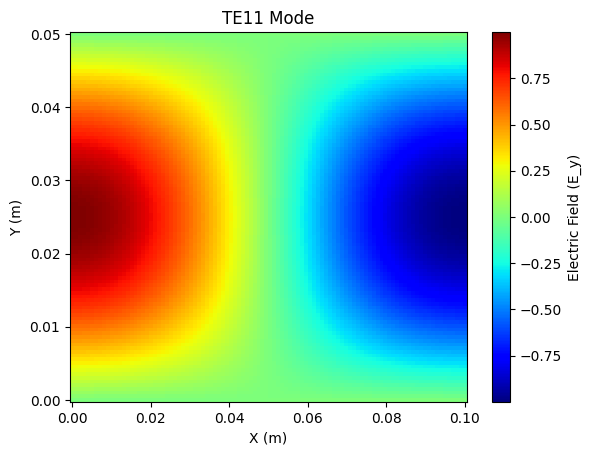

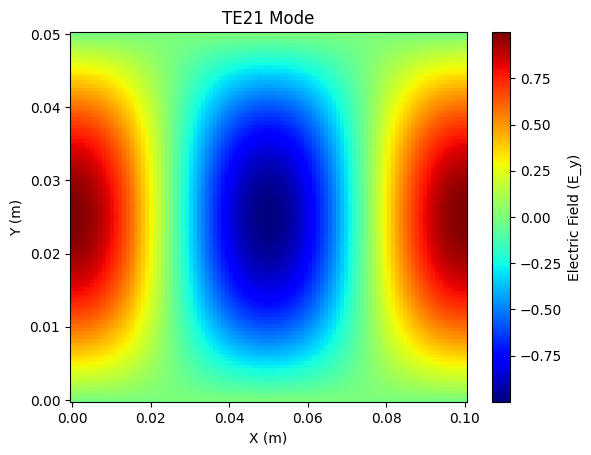

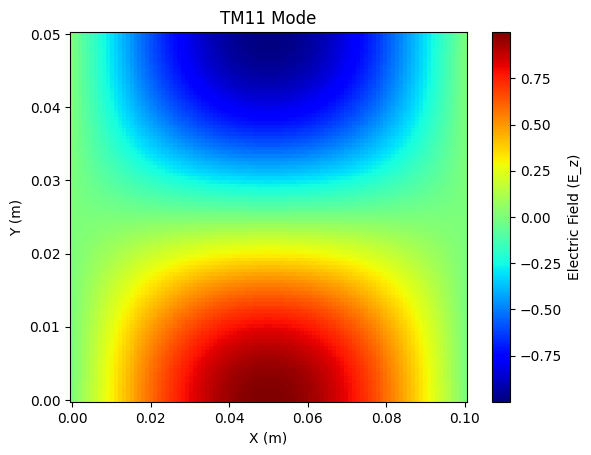

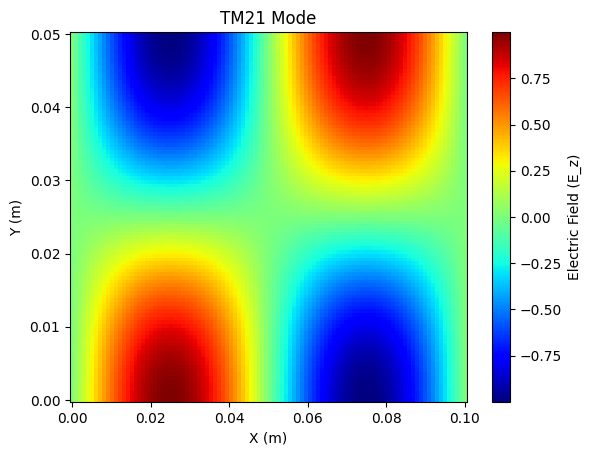

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, epsilon_0, pi

class TE_TM_Functions:
    def __init__(self, m, n, a, b):
        self.m = m
        self.n = n
        self.a = a
        self.b = b
        self.f_c = self.calculate_cutoff_frequency()
        self.w = 2 * pi * 2 * self.f_c  # Operating frequency is twice the cutoff frequency

    def calculate_cutoff_frequency(self):
        return (1 / (2 * np.sqrt(mu_0 * epsilon_0))) * np.sqrt(
            (self.m / self.a)**2 + (self.n / self.b)**2)

    def Kc(self):
        return np.sqrt((self.m * pi / self.a)**2 + (self.n * pi / self.b)**2)

# Function to plot TE and TM modes
def plot_modes(mode_type, m, n, a, b):
    x = np.linspace(0, a, 100)
    y = np.linspace(0, b, 100)
    X, Y = np.meshgrid(x, y)

    if mode_type == 'TE':
        E_x = np.zeros_like(X)  # TE modes have E_x = 0 in rectangular waveguides
        E_y = np.cos(m * pi * X / a) * np.sin(n * pi * Y / b)
        H_z = np.sin(m * pi * X / a) * np.cos(n * pi * Y / b)
        title = f'TE{m}{n} Mode'
        vector_field = E_y
        field_label = 'Electric Field (E_y)'
    elif mode_type == 'TM':
        E_z = np.sin(m * pi * X / a) * np.cos(n * pi * Y / b)
        H_x = np.zeros_like(X)  # TM modes have H_x = 0 in rectangular waveguides
        H_y = np.cos(m * pi * X / a) * np.sin(n * pi * Y / b)
        title = f'TM{m}{n} Mode'
        vector_field = E_z
        field_label = 'Electric Field (E_z)'

    fig, ax = plt.subplots()
    c = ax.pcolormesh(X, Y, vector_field, shading='auto', cmap='jet')
    fig.colorbar(c, ax=ax, label=field_label)
    plt.title(title)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.show()

# Parameters for the waveguide
a, b = 0.1, 0.05  # dimensions in meters

# Mode numbers to visualize
modes = [('TE', 1, 1), ('TE', 2, 1), ('TM', 1, 1), ('TM', 2, 1)]

for mode_type, m, n in modes:
    plot_modes(mode_type, m, n, a, b)


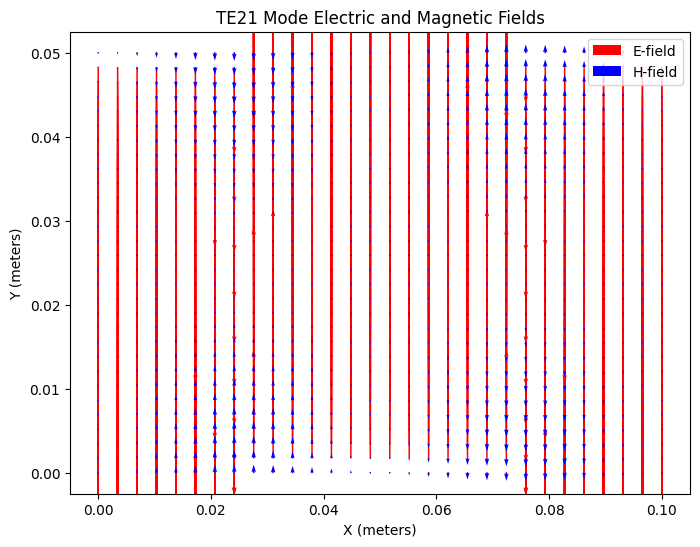

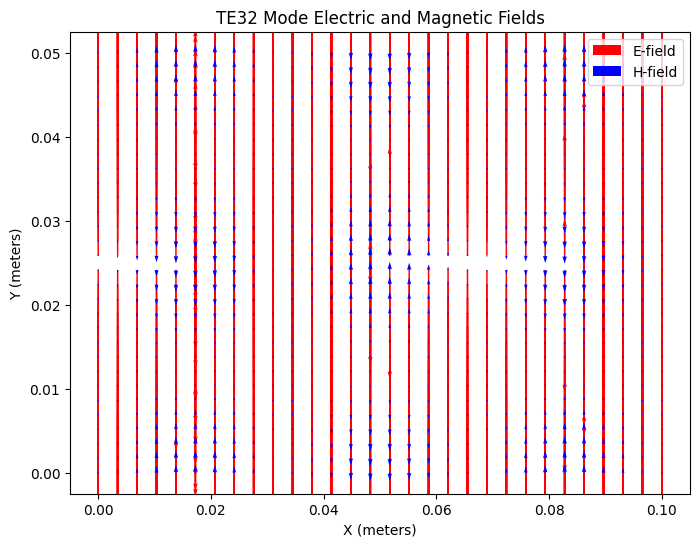

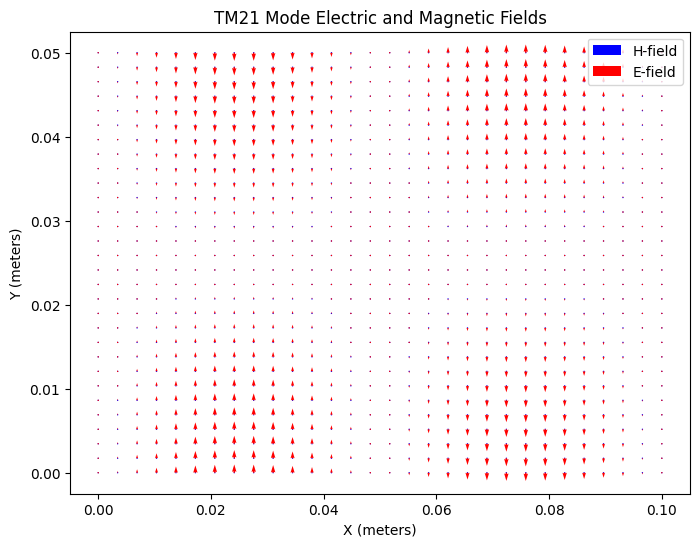

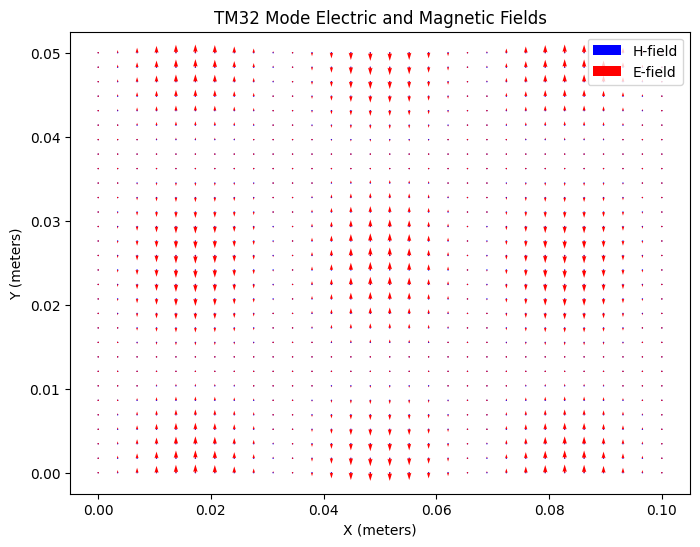

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, epsilon_0, pi

class TE_TM_Functions:
    def __init__(self, m, n, a, b):
        self.m = m
        self.n = n
        self.a = a
        self.b = b
        self.f_c = self.calculate_cutoff_frequency()
        self.w = 2 * pi * 2 * self.f_c  # Operating frequency is twice the cutoff frequency
        self.k = self.Kc()  # Cutoff wavenumber

    def calculate_cutoff_frequency(self):
        return (1 / (2 * np.sqrt(mu_0 * epsilon_0))) * np.sqrt(
            (self.m / self.a)**2 + (self.n / self.b)**2)

    def Kc(self):
        return np.sqrt((self.m * pi / self.a)**2 + (self.n * pi / self.b)**2)

# Define parameters for the waveguide
a, b = 0.1, 0.05  # dimensions in meters

# Define mode numbers
modes = [
    ('TE', 2, 1),
    ('TE', 3, 2),
    ('TM', 2, 1),
    ('TM', 3, 2)
]

# Function to plot field vectors for TE and TM modes
def plot_field_vectors(mode_type, m, n, a, b):
    x = np.linspace(0, a, 30)
    y = np.linspace(0, b, 30)
    X, Y = np.meshgrid(x, y)

    model = TE_TM_Functions(m, n, a, b)
    omega = model.w
    k = model.k

    if mode_type == 'TE':
        E_x = np.zeros_like(X)
        E_y = omega * mu_0 * (-1) * np.cos(m * pi * X / a) * np.sin(n * pi * Y / b) / k
        H_z = np.sin(m * pi * X / a) * np.cos(n * pi * Y / b)
        plt.quiver(X, Y, E_x, E_y, color='red', scale=75, label='E-field')
        plt.quiver(X, Y, np.zeros_like(X), H_z, color='blue', scale=75, label='H-field')
        plt.title(f'{mode_type}{m}{n} Mode Electric and Magnetic Fields')

    elif mode_type == 'TM':
        E_z = np.sin(m * pi * X / a) * np.cos(n * pi * Y / b)
        H_x = np.zeros_like(X)
        H_y = omega * epsilon_0 * np.cos(m * pi * X / a) * np.sin(n * pi * Y / b) / k
        plt.quiver(X, Y, H_x, H_y, color='blue', scale=75, label='H-field')
        plt.quiver(X, Y, np.zeros_like(X), E_z, color='red', scale=75, label='E-field')
        plt.title(f'{mode_type}{m}{n} Mode Electric and Magnetic Fields')

    plt.xlabel('X (meters)')
    plt.ylabel('Y (meters)')
    plt.legend()
    plt.show()

# Plotting field vectors for each mode
for mode_type, m, n in modes:
    plt.figure(figsize=(8, 6))
    plot_field_vectors(mode_type, m, n, a, b)
